In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df2 = df.copy()
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning

## - Missing Values

In [3]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Result:
###### We have zero null values in all columns 

## - Unmatched Features' Type

In [4]:
df2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Result:
###### We can see all columns data type are correct

## - Data Inconsistensy

In [5]:
# Glucose > 40 && Glucose < 700
# BloodPressure != 0
# SkinThickness != 0
# Insulin != 0
# BMI > 13 && BMI < 400
# DiabetesPedigreeFunction > 0 && DiabetesPedigreeFunction < 4
# Outcome should only have two values 0, and 1

In [6]:
# Glucose > 40 && Glucose < 700
df2[df2['Glucose'] <= 40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
## Assigning unrealistic values to Nan
df.loc[df[df['Glucose'] <= 40].index, 'Glucose'] = np.NaN

#### Result:
###### We have 5 interies with 0 Glucose which will need to be assigned to NaN for KNN Imputation

In [8]:
df.loc[df[df["BloodPressure"] == 0].index, 'BloodPressure'] = np.NaN

In [9]:
df.loc[df[df['SkinThickness'] == 0].index, 'SkinThickness'] = np.NaN

In [10]:
df[df['DiabetesPedigreeFunction'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
df['Age'].min()

21

In [12]:
df['Outcome'].unique()

array([1, 0])

In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
df.isnull().any(axis=1).sum()

234

In [15]:
234 / df.shape[0] * 100

30.46875

#### Result:
###### after assigning any unrealstic value to NaN we have the following columns with the number of NaN values:
###### Glucose                       5
###### BloodPressure                35
###### SkinThickness               227
###### with a total number of rows with at least one NaN value = 234, which is %30.46 of the total dataset
###### these rows will not be dropped instead they will be imputated using KNN Algorithms

## 4- Checking For Outliers

<AxesSubplot:ylabel='Pregnancies'>

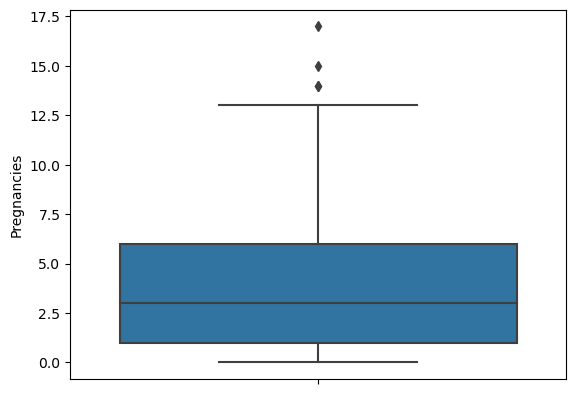

In [16]:
sns.boxplot(y=df['Pregnancies'])

In [17]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

#### Result:
###### the maximum number is 17 is that ok? well I know some who have 40 so it is ok

<AxesSubplot:ylabel='Glucose'>

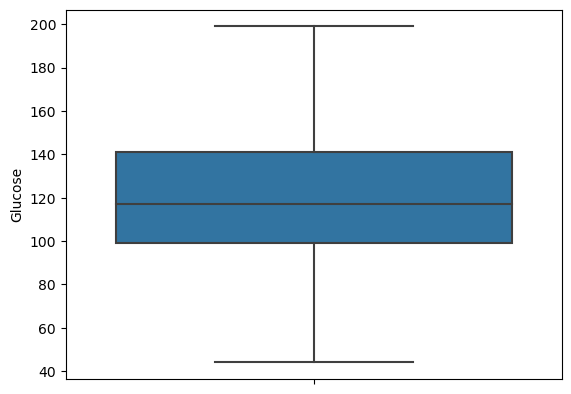

In [18]:
sns.boxplot(y=df['Glucose'])

<AxesSubplot:ylabel='BloodPressure'>

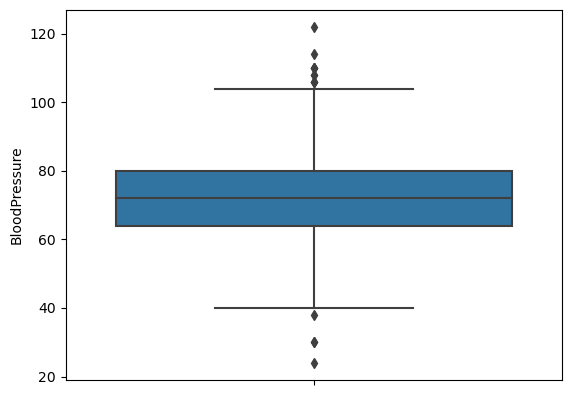

In [19]:
sns.boxplot(y=df['BloodPressure'])

<AxesSubplot:ylabel='SkinThickness'>

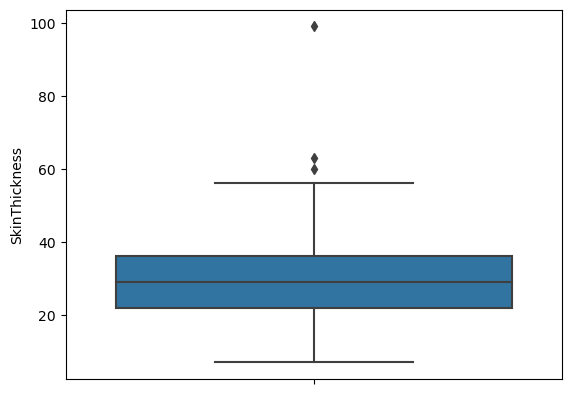

In [20]:
sns.boxplot(y=df['SkinThickness'])

<AxesSubplot:ylabel='Insulin'>

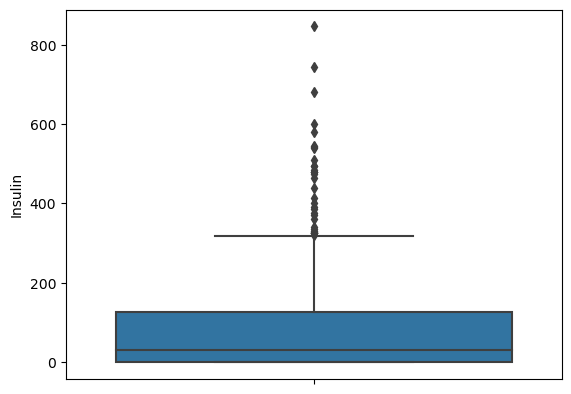

In [21]:
sns.boxplot(y=df['Insulin'])

<AxesSubplot:ylabel='BMI'>

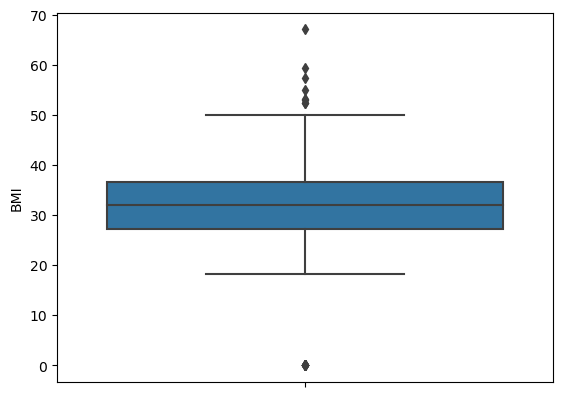

In [22]:
sns.boxplot(y=df['BMI'])

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

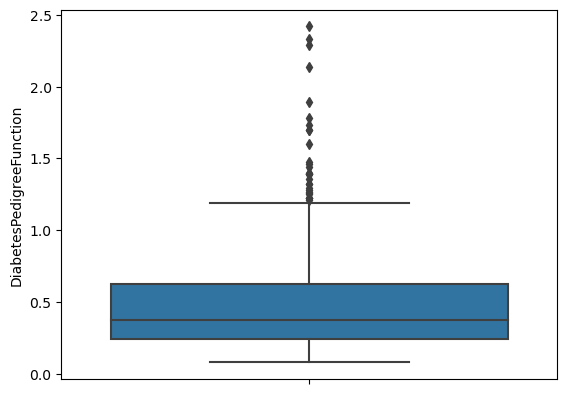

In [23]:
sns.boxplot(y=df['DiabetesPedigreeFunction'])

<AxesSubplot:ylabel='Age'>

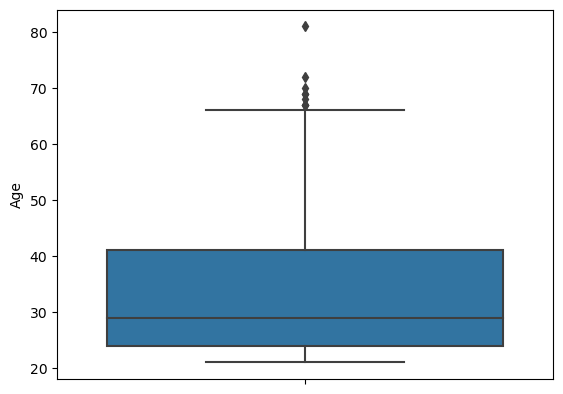

In [24]:
sns.boxplot(y=df['Age'])

#### Result:
###### All these outliers will be scalled latter but they are healthy outliers so no needed to remove them

# Data Analysis

In [25]:
df.corr().style.background_gradient(axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.331550,0.235666,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,-0.047375,0.258735,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.126423,0.631959,0.115016,0.166816,0.259491
Insulin,-0.073535,0.331550,-0.047375,0.126423,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.235666,0.258735,0.631959,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.130548,0.292695,0.173844,0.238356,1.000000


#### Result:
###### WE can see that **Glucose** is the strongest factor of value 1 Outcome followed by, **BMI**, **SkinThickness**, **Age**, **Pregnancies**, **DiabetesPedigreeFunction**, **BloodPressure**, and lastly **Insulin**

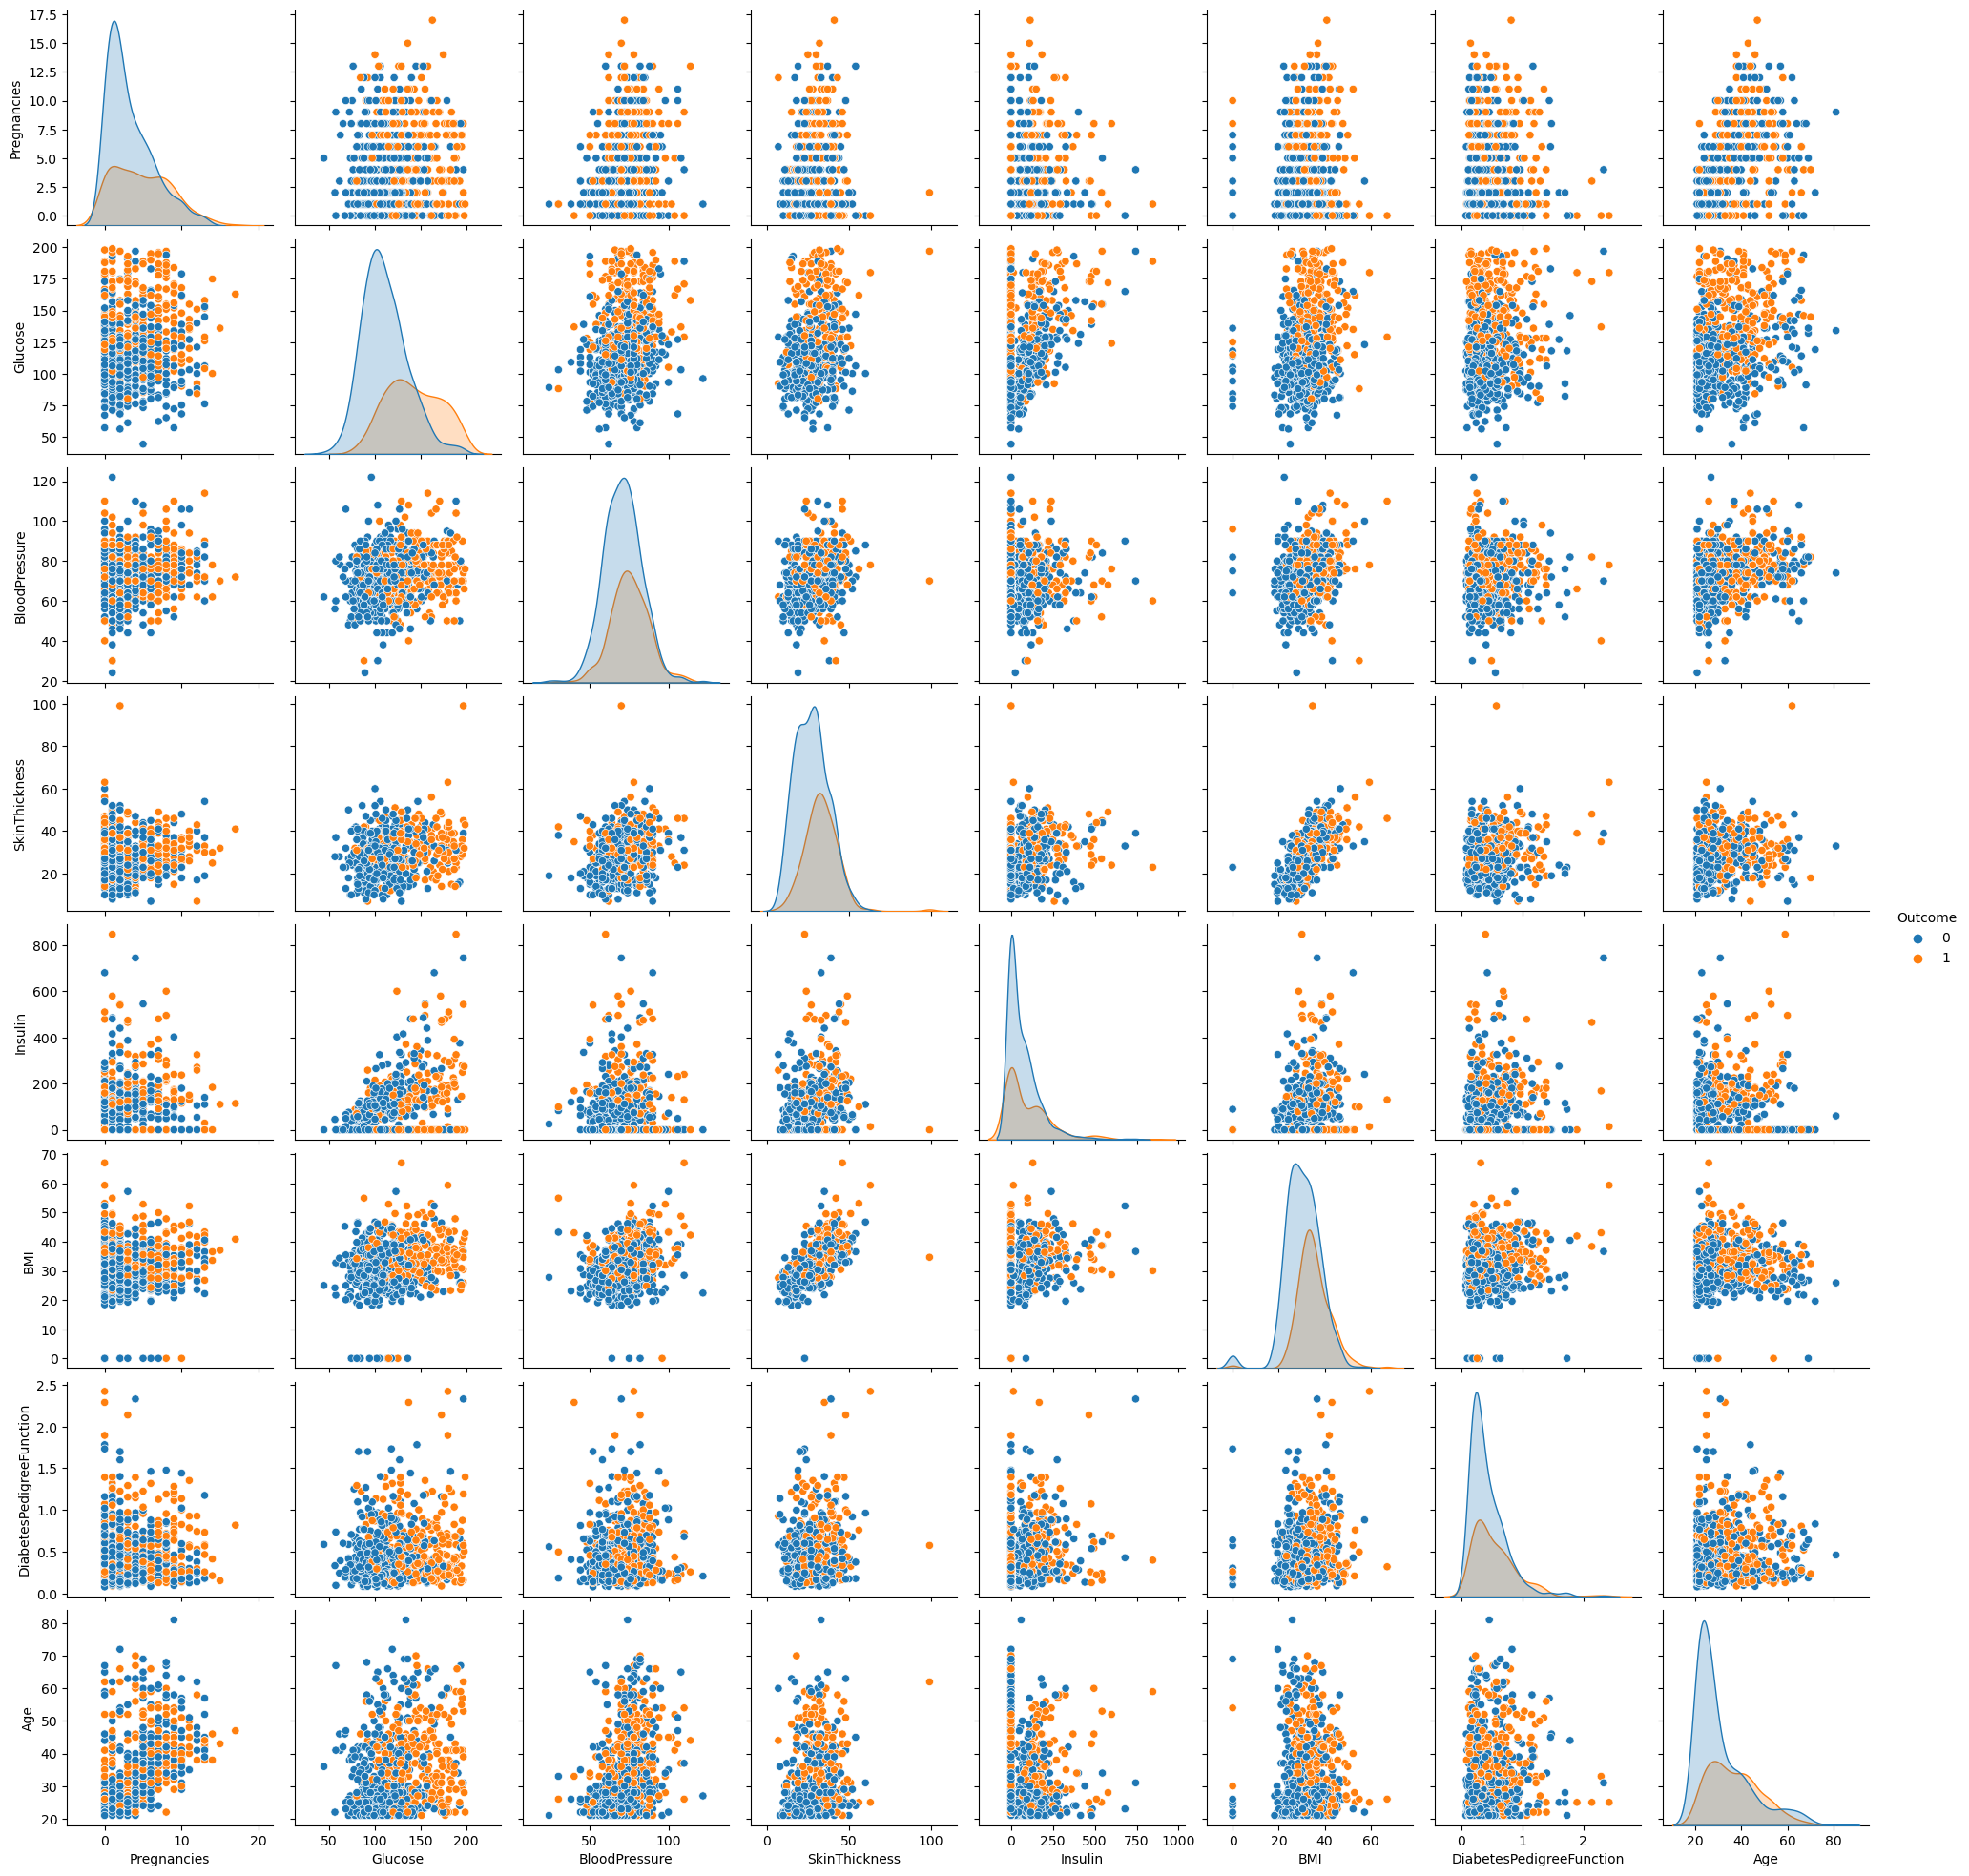

In [26]:
sns.pairplot(df, hue='Outcome')

#### Result:
###### We can see high Glucos is highly asscoiated with Diabetes

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

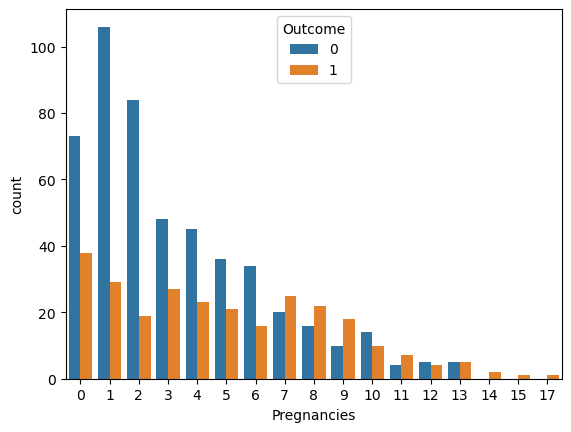

In [27]:
sns.countplot(x=df['Pregnancies'], hue=df['Outcome'])

In [28]:
dfOnlyYes = df[df['Outcome']==1]
dfOnlyYes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110,36.5,1.057,37,1
757,0,123.0,72.0,NaN,0,36.3,0.258,52,1
759,6,190.0,92.0,NaN,0,35.5,0.278,66,1
761,9,170.0,74.0,31.0,0,44.0,0.403,43,1


Text(0.5, 1.0, 'Average Glucose Level / Pregnancies')

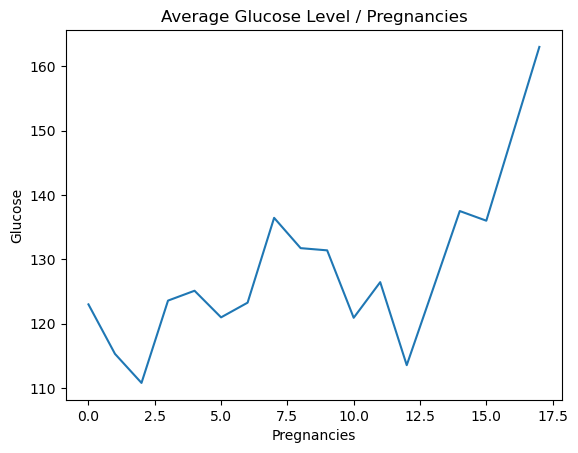

In [29]:
pregnanciesVsGlucose = df[['Pregnancies', 'Glucose']].groupby(df['Pregnancies']).mean()
sns.lineplot(x=pregnanciesVsGlucose['Pregnancies'], y=pregnanciesVsGlucose['Glucose'])
plt.title('Average Glucose Level / Pregnancies')

In [30]:
pregnanciesVsGlucose = df[['Pregnancies', 'Glucose']].groupby(df['Pregnancies']).mean().style.bar(subset='Glucose')
pregnanciesVsGlucose

,Pregnancies,Glucose
Pregnancies,,
0,0.000000,123.000000
1,1.000000,115.310606
2,2.000000,110.796117
3,3.000000,123.586667
4,4.000000,125.117647
5,5.000000,120.982143
6,6.000000,123.265306
7,7.000000,136.444444
8,8.000000,131.736842


Text(0.5, 1.0, 'Average Glucose Level / BMI')

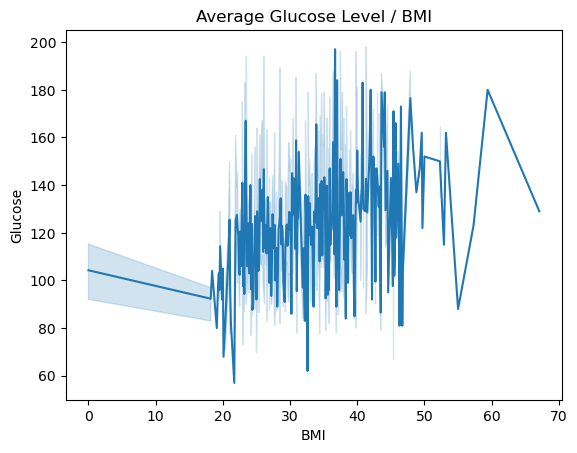

In [31]:
sns.lineplot(x=df['BMI'], y=df['Glucose'])
plt.title('Average Glucose Level / BMI')

In [32]:
BMIVsGlucose = df[['BMI', 'Glucose']].groupby(df['BMI']).mean().style.bar(subset='Glucose')
BMIVsGlucose

,BMI,Glucose
BMI,,
0.000000,0.000000,104.272727
18.200000,18.200000,92.333333
18.400000,18.400000,104.000000
19.100000,19.100000,80.000000
19.300000,19.300000,99.000000
19.400000,19.400000,103.000000
19.500000,19.500000,96.000000
19.600000,19.600000,114.333333
19.900000,19.900000,92.000000


Text(0.5, 1.0, 'Average Glucose Level / Age')

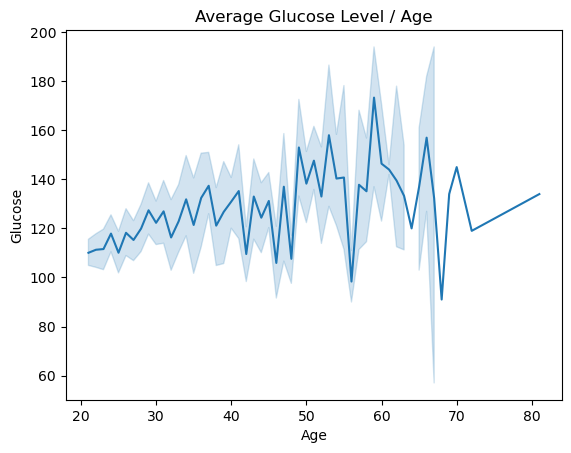

In [33]:
sns.lineplot(x=df['Age'], y=df['Glucose'], )
plt.title('Average Glucose Level / Age')

In [34]:
AgeVsGlucose = df[['Age', 'Glucose']].groupby(df['Age']).mean().style.bar(subset='Glucose')
AgeVsGlucose

,Age,Glucose
Age,,
21,21.000000,110.064516
22,22.000000,111.300000
23,23.000000,111.578947
24,24.000000,117.891304
25,25.000000,110.083333
26,26.000000,118.212121
27,27.000000,115.281250
28,28.000000,119.914286
29,29.000000,127.379310


## - Data Imputing Using KNN Imputor

In [35]:
from sklearn.impute import KNNImputer
KNNImputer = KNNImputer(n_neighbors=3) ## K = 3
KNNImputer

KNNImputer(n_neighbors=3)

In [36]:
NewDF = pd.DataFrame(KNNImputer.fit_transform(df))

In [37]:
## checking for Null values after using the Imputer, the null value should be 0 for all columns
NewDF.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [38]:
## the imputer works good except we need to rename the columns and convert some of the columns into Int type
NewDF.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [39]:
NewDF.rename(columns = {0: 'Pregnancies', 1: 'Glucose' ,2: 'BloodPressure' ,3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age', 8: 'Outcome'}, inplace=True)
NewDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [40]:
NewDF[['Pregnancies', 'Insulin', 'Age', 'Outcome']] = NewDF[['Pregnancies', 'Insulin', 'Age', 'Outcome']].astype('int')
X = NewDF[NewDF.columns[~NewDF.columns.isin(['Outcome'])]]
Y = NewDF['Outcome']
NewDF

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,32.000000,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112,26.2,0.245,30,0
766,1,126.0,60.0,33.333333,0,30.1,0.349,47,1


## - Importing StandardScaler to scale all the Independent Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scalling_fit = scaler.fit(X)
x_scalling_transform = scaler.transform(X)
x_scalling_transform

In [ ]:
x_scalling_transform

## - Importing train_test_split in case if we don't use CV (K Fold Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scalling_transform, Y, test_size=0.3, random_state=42)

## - Importing one of the model evaluation accuracy score (metrics), incase if we don't want to use CV or GS CV

In [ ]:
from sklearn import metrics

## - Adding all the classifiction models we need

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
## using sys library to install libraries that does not exist in anaconda 
import sys
!{sys.executable} -m pip install xgboost
import xgboost

## - Using Cross validation to test each model variance and bias and identify the best one (all columns parameters are defult parameters)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

SVC = svm.SVC
CVS = cross_val_score

def modelsPipLine():
    modelsDict = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    }
    for modelName, modelAlgorithm in modelsDict.items():
        print('=============================================')
        print(f'Model Name: {modelName}')
        print(CVS(estimator=modelAlgorithm, X=x_scalling_transform, y=Y, cv=5, scoring='accuracy'))

modelsPipLine()

#### Result:
###### the above is the mean accuracy for each model using cross_val_score

## - Using GridSearchCV to get the best Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

objectOfModels = {

'SVC' : {
    SVC():{
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'gamma': ["scale", "auto"]
    }
}
,
'DecisionTreeClassifier' : {
    DecisionTreeClassifier(): {
    'criterion': ['gini', "entropy", "log_loss"],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    }
}
,
'RandomForestClassifier': {
    RandomForestClassifier(): {
    'n_estimators': [1,10,50,100,500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None,1,5,10,100],
    'max_features': ['sqrt', 'log2', None]
    }
}

,

'GradientBoostingClassifier': {
    
    GradientBoostingClassifier(): {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [1,5,10,50,100,200, 500],
    'criterion': ["friedman_mse", "squared_error"],
    'max_depth': [None, 1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
    }
}
,
    
'KNeighborsClassifier': {
    KNeighborsClassifier():{
    'n_neighbors': [1,3,5,7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': [5,7,10,20,25,30,35,40],
    'p': [1,2,3,4]
    }
}
,
'GaussianNB' : {
    GaussianNB(): {
    'priors': [None],
    'var_smoothing': [1e-9]
    }
}
}


models = []

for modelName, modelProperities in objectOfModels.items():
    for (model, parameters) in modelProperities.items():
        print(f'{model} | {parameters}')
        GS = GridSearchCV(model, parameters, cv=5, verbose=4)
        GS.fit(x_scalling_transform, Y)
        models.append({
        'Model': model,
        'Best Parameters': GS.best_params_,
        'Best Score': GS.best_score_
        })
    

In [ ]:
modelsPerformanceDf = pd.DataFrame(models, columns=['Model', 'Best Parameters', 'Best Score'])
modelsPerformanceDf.sort_values(by='Best Score', ascending=False)

#### Result:
###### The best model was 
 ###### {'Model': KNeighborsClassifier(),
 ######  'Best Parameters': {'algorithm': 'auto',
 ######   'leaf_size': 5,
 ######   'n_neighbors': 7,
 ######   'p': 2,
 ######   'weights': 'distance'},
 ######  'Best Score': 0.8025268258913119}
###### which is not great but it is the best one

## - Using Cross validation with the best model and best parameter to check the Variance and Bias

In [ ]:
cross_val_score(KNeighborsClassifier(algorithm= 'auto',leaf_size = 5, n_neighbors = 7, p = 2, weights = 'distance'), x_scalling_transform, Y, cv=5)

In [ ]:
cross_val_score(RandomForestClassifier(), x_scalling_transform, Y, cv=5)

#### Result:
###### We can see both models K folds have low variance byt high bias

## - Using Metrics and Classification report to see both models scores visually in depth

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
knnClassifier = KNeighborsClassifier(algorithm= 'auto',leaf_size = 5, n_neighbors = 7, p = 2, weights = 'distance')
knnClassifier.fit(x_train, y_train)
y_predict_Knn = knnClassifier.predict(x_test)

In [ ]:
confusionMatrixKnn = metrics.confusion_matrix(y_test, y_predict_Knn)
heatMapKnn = sns.heatmap(pd.DataFrame(confusionMatrixKnn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix Knn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_predict_Knn))

In [ ]:
RC = RandomForestClassifier()
RC.fit(x_train, y_train)
y_predictRC = RC.predict(x_test)

In [ ]:
confusionMatrixRC = metrics.confusion_matrix(y_test, y_predictRC)
heatmapRC = sns.heatmap(pd.DataFrame(confusionMatrixRC), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix RC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_predictRC))

#### Result:
###### if we take a look at the classification_report for both models, we can see that RandomForestClassifier and KNeighborsClassifier are very close, but RandomForestClassifier has better scoring

## - Picking the best model

In [ ]:
# Comparing the best model using GridSearch CV (KNeighborsClassifier) 
# and CV best Model (RandomForestClassifier)
print(f' model: RandomForestClassifier, Mean Score = {np.array([0.78571429, 0.74675325, 0.75324675, 0.82352941, 0.76470588]).mean()}')
# has better mean score than KNeighborsClassifier, so we will choose RandomForestClassifier over KNeighborsClassifier
# even we can see it has a bad score %77.4 but still it is the best model we have 
# model score could be better if we have more data and cleaner data

## - Exporting ML Model and Scaller

In [ ]:
import joblib

In [ ]:
joblib.dump(RC, 'model.h5')

In [ ]:
joblib.dump(scaler, 'scaler.h5')